# MΥΕ046 – Υπολογιστική Όραση: Άνοιξη 2023
## 2η Σειρά Ασκήσεων: 25% του συνολικού βαθμού
## Διδάσκων: Άγγελος Γιώτης
- ΠΑΡΑΔΟΣΗ: **Σάββατο, 13 Μαΐου, 2023 23:59**

# Γενικές Οδηγίες

Απαντήστε στα παρακάτω ζητήματα χρησιμοποιώντας Python στο συνημμένο σημειωματάριο Jupyter και ακολουθήστε τις παρακάτω οδηγίες:
 
- Οι ασκήσεις είναι **ατομικές** - δεν επιτρέπεται η μεταξύ σας συνεργασία για την υλοποίηση/παράδοσή τους.

- Δεν επιτρέπεται να χρησιμοποιήσετε κώδικα που τυχόν θα βρείτε στο web (είτε αυτούσιο, είτε παραγόμενο από ΑΙ). Η χρήση κώδικα τρίτων θα έχει σαν αποτέλεσμα τον αυτόματο μηδενισμό σας.

- Όλες οι λύσεις πρέπει να είναι γραμμένες σε αυτό το σημειωματάριο `Jupyter notebook`.

- Ο κώδικάς σας πρέπει να σχολιαστεί εκτενώς.

- Αφού ολοκληρώσετε (υλοποιήσετε και εκτελέσετε) τις απαντήσεις σας στο σημειωματάριο (notebook), εξαγάγετε το notebook ως PDF και υποβάλετε, τόσο το σημειωματάριο όσο και το PDF (δηλαδή τα αρχεία `.ipynb` και `.pdf`) στο `turnin` του μαθήματος, μαζί με ένα συνοδευτικό αρχείο `onoma.txt` που θα περιέχει το ον/μο σας και τον Α.Μ. σας.

- Οι απαντήσεις θα παραδοθούν με την εντολή: **turnin assignment_2@mye046 onoma.txt assignment2.ipynb assignment2.pdf**

- Μπορείτε να χρησιμοποιήσετε βασικά πακέτα γραμμικής άλγεβρας (π.χ. `NumPy`, `SciPy` κ.λπ.), αλλά δεν επιτρέπεται να χρησιμοποιείτε τα πακέτα/βιβλιοθήκες που επιλύουν άμεσα τα προβλήματα. Μη διστάσετε να ρωτήσετε τον διδάσκοντα εάν δεν είστε σίγουροι για τα πακέτα που θα χρησιμοποιήσετε.

- Συνιστάται ιδιαίτερα να αρχίσετε να εργάζεστε στις ασκήσεις σας το συντομότερο δυνατό!

**Late Policy:** Εργασίες που υποβάλλονται καθυστερημένα θα λαμβάνουν μείωση βαθμού 10% για κάθε 24 ώρες καθυστέρησης. Οι εργασίες δεν θα γίνονται δεκτές 72 ώρες (3 ημέρες) μετά την προθεσμία παράδοσης. Για παράδειγμα, παράδοση της εργασίας 2 ημέρες μετά την προθεσμία βαθμολογείται με άριστα το 20 (από 25).

## Άσκηση 1: Φιλτράρισμα Εικόνας (image filtering) [10 μονάδες]

### Ζήτημα 1.1 Υλοποίηση συνέλιξης[6 μονάδες]


Σε αυτό το πρόβλημα, θα υλοποιήσετε τη λειτουργία φιλτραρίσματος συνέλιξης χρησιμοποιώντας συναρτήσεις της βιβλιοθήκης NumPy, αλλά χωρίς να χρησιμοποιήσετε συναρτήσεις που λύνουν απευθείας το πρόβλημα, όπως η συνάρτηση συνέλιξης "numpy.convolve".

Όπως έχουμε δει και στο μάθημα, η συνέλιξη μπορεί να θεωρηθεί ως ένα κυλιόμενο παράθυρο που υπολογίζει ένα άθροισμα των τιμών των pixel που σταθμίζονται από τον αναποδογυρισμένο πυρήνα (a sum of pixel values weighted by the flipped kenrel).

Η έκδοσή σας θα πρέπει: i) να συμπληρώσει μια εικόνα με μηδενικά στα άκρα της εικόνας - zero-padding (επάνω-κάτω, δεξιά-αριστερά), ii) να αναστρέψει (flip) τον πυρήνα της συνέλιξης οριζόντια και κάθετα, και iii) να υπολογίσει ένα σταθμισμένο άθροισμα της γειτονιάς σε κάθε pixel.

#### Ζήτημα 1.1.1  [1 μονάδα]
Πρώτα θα χρειαστεί να υλοποιήσετε τη συνάρτηση **zero_pad**.

In [3]:
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


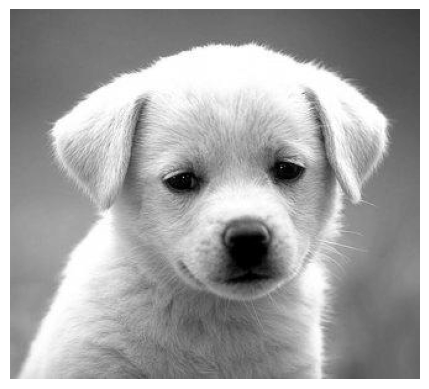

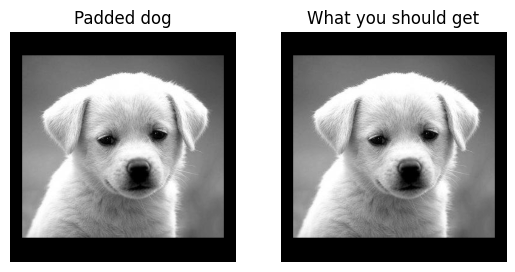

In [4]:
def zero_pad(image, pad_top, pad_down, pad_left, pad_right):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_top = 1, pad_down = 1, pad_left = 2, pad_right = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W)
        pad_left: width of the zero padding to the left of the first column
        pad_right: width of the zero padding to the right of the last column
        pad_top: height of the zero padding above the first row
        pad_down: height of the zero padding below the last row

    Returns:
        out: numpy array of shape (H + pad_top + pad_down, W + pad_left + pad_right)
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    H,W = image.shape
    H_padded = H + pad_top + pad_down #We add the desired padding values to the original Height 
    W_padded = W + pad_left + pad_right #We add the desired padding values to the original Width
    padded_image = np.zeros((H_padded, W_padded) , dtype = image.dtype) #We create a new array with the desired dimensions and fill it with zeros
    padded_image[pad_top : H_padded - pad_down, pad_left : W_padded - pad_right] = image #We copy the original image inside the padded image

    return padded_image

# Open image as grayscale
img = io.imread('/content/drive/MyDrive/assignment2/images/dog.jpg', as_gray=True)

# Show image
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_height, pad_width, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img,cmap='gray')
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('/content/drive/MyDrive/assignment2/images/padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img,cmap='gray')
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Ζήτημα 1.1.2 [3 μονάδες]
Τώρα υλοποιήστε τη συνάρτηση **`conv`**, **χρησιμοποιώντας το πολύ 2 βρόχους επανάληψης**. Αυτή η συνάρτηση θα πρέπει να δέχεται μια εικόνα $f$ και έναν πυρήνα/φίλτρο $h$ ως εισόδους και να εξάγει το αποτέλεσμα της συνέλιξης (προκύπτουσα εικόνα) $(f*h)$ που έχει το **ίδιο** σχήμα (διαστάσεις) με την εικόνα εισόδου (χρησιμοποιήστε συμπλήρωση μηδενικών - zero padding, για να το πετύχετε). Θα θεωρήσουμε πως χρησιμοποιούμε μόνο πυρήνες με περιττό πλάτος και περιττό ύψος. Ανάλογα με τον υπολογιστή, η υλοποίησή σας θα χρειαστεί περίπου ένα δευτερόλεπτο ή λιγότερο για να εκτελεστεί.

Υπόδειξη: Για να έχει το αποτέλεσμα της συνέλιξης $g(x,y) = h(x,y) * f(x,y)$ το **ίδιο σχήμα** με την εικόνα εισόδου $f$, θα πρέπει οι διαστάσεις της συμπληρωμένης (με μηδενικά) εικόνας "padded_$f$" να είναι $P = A + C - 1$ και $Q = B + D - 1$, όπου $A, Β:height, width$ της εικόνας $f$, ενώ $C, D:height, width$, του πυρήνα $h$.

took 0.607113 seconds.


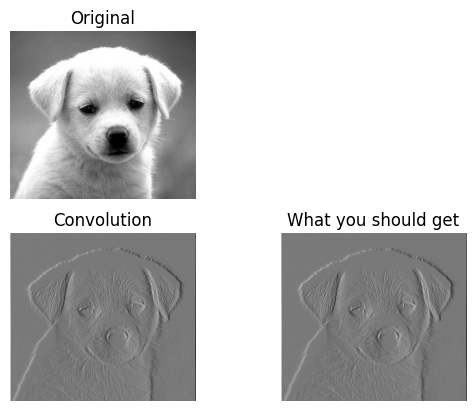

In [5]:
def conv(image, kernel):
    """ An efficient implementation of a convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute a weighted sum of the neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - You should need at most two nested for-loops
        - You may find np.flip() and np.sum() useful
        - You need to handle both odd and even kernel size

    Args:
        image: numpy array of shape (Hi, Wi)
        kernel: numpy array of shape (Hk, Wk)

    Returns:
        out: numpy array of shape (Hi, Wi)
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    """ ==========
    YOUR CODE HERE
    ========== """
    if Hk % 2 == 0: #If the kernel Hk is even
      pad_top = Hk//2 - 1 #Removes the extra row so we get the right shape
      pad_down = Hk//2
    else: #If the kernel Hk is odd
      pad_top = Hk//2
      pad_down = Hk//2
    
    if Wk % 2 == 0: #If the kernel Wk is even
      pad_left = Wk//2 - 1 #Removes the extra column so we get the right shape
      pad_wright = Wk//2
    else: #If the kernel Wk is odd
      pad_left = Wk//2 
      pad_right = Wk//2
    
    padded_image = zero_pad(image, pad_top, pad_down, pad_left, pad_right) #Getting the image with the right dimensions filled with zeros
    kernel = np.flip(kernel) #We flip the kernel so it is properly alligned with the corresponding image pixels 

    for i in range(Hi):
      for j in range(Wi):
        padded_image2 = padded_image[i:i+Hk,j:j+Wk]
        sum = np.sum(padded_image2 * kernel) #We multiply the corresponding elements and then add them using np.sum
        out[i,j] = sum #Store the sum from above to get all the values of the image

    return out

# Simple convolution kernel.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

t1 = time()
out = conv(img, kernel)
t2 = time()
print("took %f seconds." % (t2 - t1))

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out,cmap='gray')

plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('/content/drive/MyDrive/assignment2/images/convolved_dog.jpg', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img,cmap='gray')
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Ζήτημα 1.1.3 [1 μονάδα]
Τώρα ας φιλτράρουμε μερικές εικόνες! Σε αυτό το ζήτημα, θα εφαρμόσετε τη συνάρτηση συνέλιξης που μόλις υλοποιήσατε για να δημιουργήσετε μερικά ενδιαφέροντα εφέ εικόνας. Πιο συγκεκριμένα, θα χρησιμοποιήσετε συνέλιξη για να "θολώσετε" (blur) και να "οξύνετε" (sharpen) την εικόνα.

Αρχικά, θα εφαρμόσετε συνέλιξη για θόλωση εικόνας. Για να το πετύχετε αυτό, πραγματοποιήστε συνέλιξη της εικόνας του σκύλου με ένα Γκαουσιανό φίλτρο 13x13 για $\sigma = 2,0$. Μπορείτε να χρησιμοποιήσετε τη συνάρτηση που σας δίνετε για να πάρετε τον Γκαουσιανό πυρήνα της συνέλιξης.

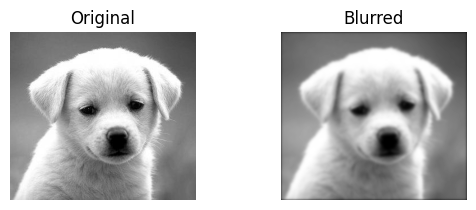

In [6]:
def gaussian2d(sig):
    """
    Creates 2D Gaussian kernel with a sigma of `sig`.
    """
    filter_size = int(sig * 6)
    if filter_size % 2 == 0:
        filter_size += 1
        
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def blur_image(img):
    """Blur the image by convolving with a Gaussian filter."""
    blurred_img = np.zeros_like(img)
    """ ==========
    YOUR CODE HERE
    ========== """
    sigma = 2.0 #Sigma value for the Gaussian kernel
    kernel = gaussian2d(sigma) #Generate the Gaussian kernel using the gaussian2d function
    blurred_img = conv(img, kernel) #Convolve the image with the Gaussian kernel to get the blurred image

    return blurred_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot blurred image
plt.subplot(2,2,2)
plt.imshow(blur_image(img),cmap='gray')
plt.title('Blurred')
plt.axis('off')

plt.show()

#### Ζήτημα 1.1.4 [1 μονάδα]
Στη συνέχεια, θα χρησιμοποιήσουμε τη συνέλιξη για την όξυνση (αύξηση ευκρίνειας) των εικόνων. Πραγματοποιήστε συνέλιξη της εικόνας με το ακόλουθο φίλτρο για να δημιουργήσετε ένα πιο ευκρινές αποτέλεσμα. Για ευκολία, σας δίνετε και το φίλτρο όξυνσης:


In [7]:
sharpening_kernel = np.array([
    [1, 4,     6,  4, 1],
    [4, 16,   24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16,   24, 16, 4],
    [1,  4,    6,  4, 1],
]) * -1.0 / 256.0

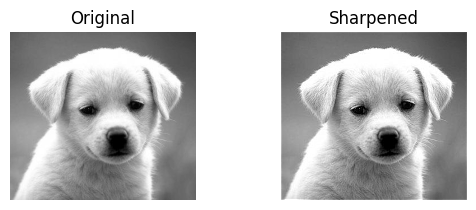

In [9]:
def sharpen_image(img):
    """Sharpen the image by convolving with a sharpening filter."""
    sharpened_img = np.zeros_like(img)
    """ ==========
    YOUR CODE HERE
    ========== """
    sharpened_img = conv(img, sharpening_kernel) #Convolve the image with the sharpening kernel to get the sharpened image
    
    return sharpened_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img, vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot sharpened image
plt.subplot(2,2,2)
plt.imshow(sharpen_image(img), vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Sharpened')
plt.axis('off')

plt.show()

### Ζήτημα 1.2 Αντιστοίχιση/Ταίριασμα Προτύπου (Template Matching) [4 μονάδες]
Υποθέτουμε το παρακάτω πρόβλημα. Έστω ένας υπάλληλος κάποιου καταστήματος super market είναι υπεύθυνος για τον περιοδικό έλεχγο των ραφιών, με σκοπό την αναπλήρωσή τους με προϊόντα που έχουν εξαντληθεί/πωληθεί (restocking sold-out items). Σε αυτή την περίπτωση, η ανάπτυξη μιας εφαρμογής υπολογιστικής όρασης, η οποία θα "βλέπει" και θα καταγράφει σε πραγματικό χρόνο τα προϊόντα στα ράφια θα μπορούσε να αυτοματοποιήσει τη δουλειά του υπαλλήλου.

Ευτυχώς, κάτι τέτοιο μπορεί να επιλυθεί ακόμη και με πρωταρχικές τεχνικές ψηφιακής επεξεργασίας εικόνας που βασίζονται στη συνέλιξη, η οποία μπορεί να αξιοποιηθεί για την αντιστοίχιση μιας εικόνας με κάποιο πρότυπο (template matching):

- Ένα αναποδογυρισμένο (flipped) πρότυπο *t* πολλαπλασιάζεται με τις περιοχές μιας μεγαλύτερης εικόνας *f* για να υπολογιστεί πόσο παρόμοια είναι κάθε περιοχή με το πρότυπο (πόσο μοιάζει κάθε περιοχή με την εικόνα προτύπου). Σημειώστε, ότι θα πρέπει να αναστρέψετε το φίλτρο πριν το δώσετε στη συνάρτηση συνέλιξης, έτσι ώστε συνολικά να μην είναι αναποδογυρισμένο όταν κάνετε συγκρίσεις.

- Επίσης, Θα χρειαστεί να αφαιρέσετε τη μέση τιμή της εικόνας ή του προτύπου (όποια και αν επιλέξετε, αφαιρέστε την ίδια τιμή, τόσο από την εικόνα όσο και από το πρότυπο) έτσι ώστε η λύση σας να μην είναι ευαίσθητη προς τις περιοχές υψηλότερης έντασης (λευκές).

- Δοκιμάστε να εκτελέσετε αρχικά τη συνέλιξη του ανεστραμμένου πυρήνα (προτύπου) με την εικόνα, χωρίς να αφαιρέσετε τη μέση τιμή και δείτε την ευαισθησία του αποτελέσματος σε περιοχές υψηλότερης έντασης. Εξηγείστε (σε σχόλια) γιατί η αφαίρεση της μέσης τιμής (και από τις 2 εικόνες) αντιμετωπίζει το πρόβλημα, κάνοντας τη λύση σας ανθεκτική σε περιοχές υψηλής έντασης.

- Παρέχεται το πρότυπο ενός προϊόντος (template.jpg) και η εικόνα του ραφιού (shelf.jpg). Θα χρησιμοποιήσετε συνέλιξη για να βρείτε το προϊόν στο ράφι.


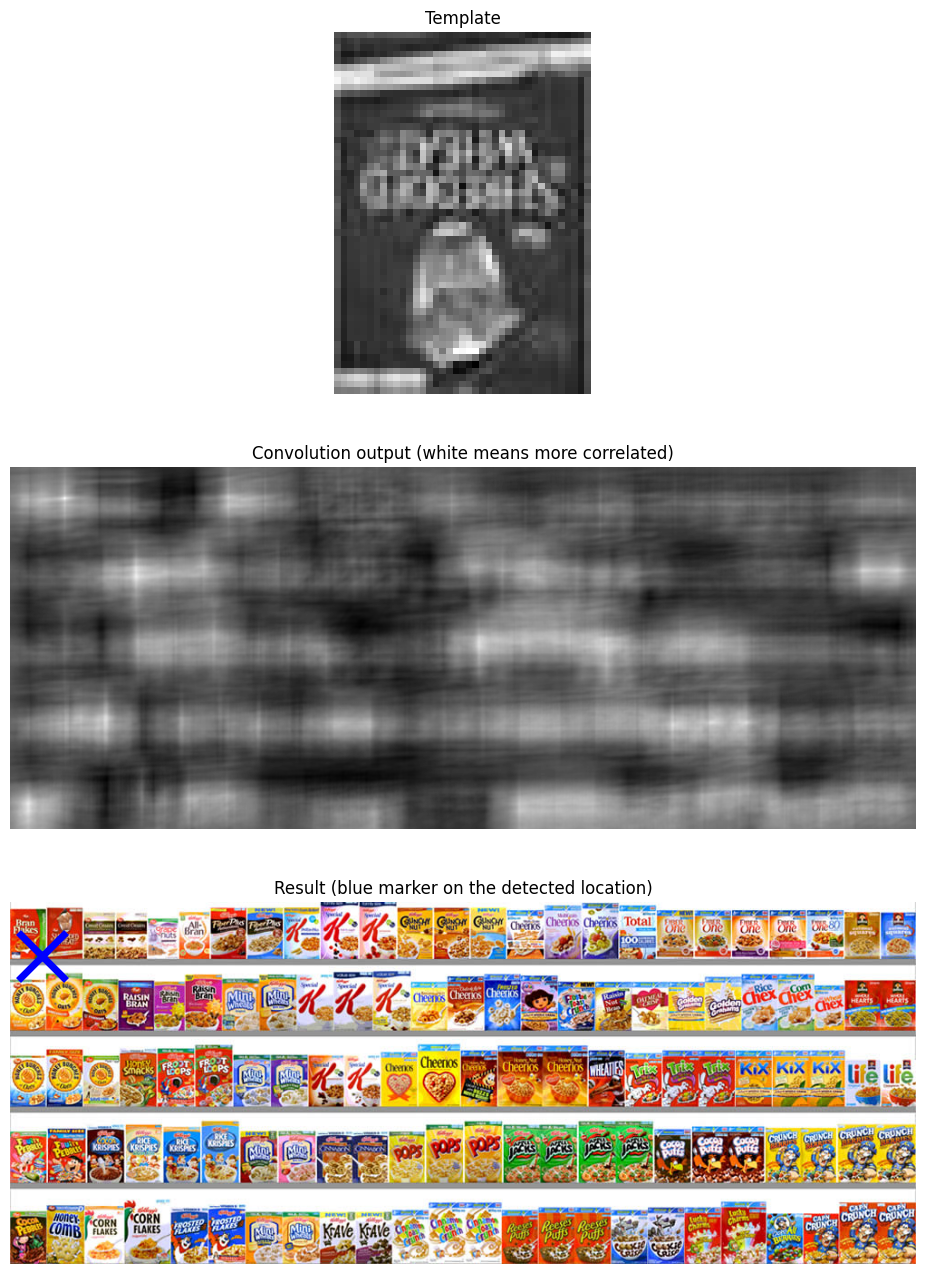

In [104]:
# Load template and image in grayscale
img = io.imread('/content/drive/MyDrive/assignment2/images/shelf.jpg')
img_gray = io.imread('/content/drive/MyDrive/assignment2/images/shelf.jpg', as_gray=True)
temp = io.imread('/content/drive/MyDrive/assignment2/images/template.jpg')
temp_gray = io.imread('/content/drive/MyDrive/assignment2/images/template.jpg', as_gray=True)

# Perform a convolution between the image (grayscale) and the template (grayscale) and store 
# the result in the out variable
""" ==========
YOUR CODE HERE
========== """
temp_gray = np.flip(temp_gray)
img_median = np.median(img_gray) #Substracting the median value from both the image 
#and the template is normalizing the intensity values in both. It enhances local intensity 
#differences between them. They are easier comparable by their overall brightness and intensities.
img_gray -=img_median
temp_gray -= img_median
out = conv(img_gray, temp_gray)

# Find the (x, y) coordinates of the maximum value in the out variable
""" ==========
YOUR CODE HERE
========== """
maximum_coordinates = np.unravel_index(np.argmax(out), out.shape)
x,y = maximum_coordinates

# Display product template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp_gray, cmap="gray")
plt.title('Template')
plt.axis('off')

# Display convolution output
plt.subplot(3, 1, 2)
plt.imshow(out, cmap="gray")
plt.title('Convolution output (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img, cmap="gray")
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=35, mew=5)
plt.show()

## Άσκηση 2: Ανίχνευση Ακμών (Edge detection) [15 μονάδες]

Σε αυτό το πρόβλημα, θα υλοποιήσετε τα βήματα του ανιχνευτή ακμών "Canny". Πρέπει να ακολουθήσετε τα βήματα με τη σειρά που σας δίνετε.

### Ζήτημα 2.1 Εξομάλυνση (Smoothing) [1 μονάδα]
Αρχικά, πρέπει να εξομαλύνουμε τις εικόνες για να αποτρέψουμε τον θόρυβο να θεωρηθεί ως ακμές. Για αυτήν την άσκηση, χρησιμοποιήστε ένα φίλτρο Γκαουσιανού πυρήνα (Gaussian) 9x9 με $\sigma = 1,5$ για να εξομαλύνετε τις εικόνες.

In [10]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import convolve
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = [5, 5]

In [11]:
def gaussian2d(sig=None):
    """Creates a 2D Gaussian kernel with
    side length `filter_size` and a sigma of `sig`."""
    filter_size = int(sig * 6)
    if filter_size % 2 == 0:
        filter_size += 1
        
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

In [12]:
def smooth(image):
    """ ==========
    YOUR CODE HERE
    ========== """
    sigma = 1.5 #Sigma value for the Gaussian kernel
    kernel = gaussian2d(sigma) #Generate the Gaussian kernel using the gaussian2d function
    smoothed_img = conv(image, kernel) #Convolve the image with the Gaussian kernel to get the smoothed image
    
    return smoothed_img

Original:


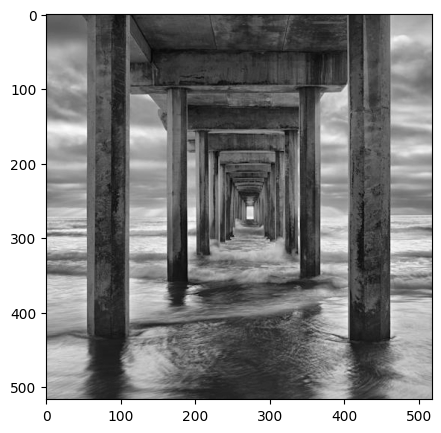

Smoothed:


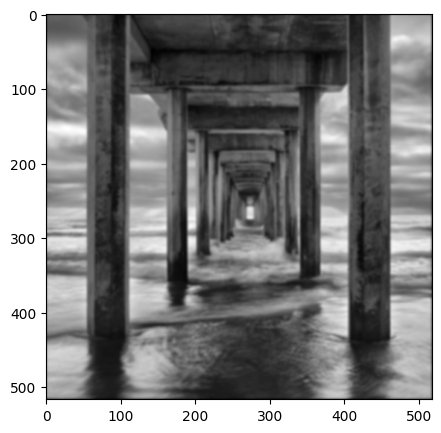

In [13]:
# Load image in grayscale
image = io.imread('/content/drive/MyDrive/assignment2/images/canny.jpg', as_gray=True)
assert len(image.shape) == 2, 'image should be grayscale; check your Python/skimage versions'
smoothed = smooth(image)
print('Original:')
plt.imshow(image, cmap=cm.gray)
plt.show()

print('Smoothed:')
plt.imshow(smoothed, cmap=cm.gray)
plt.show()

### Ζήτημα 2.2 Υπολογισμός Παραγώγου (Gradient Computation [4 μονάδες]
Αφού ολοκληρώσετε την εξομάλυνση, βρείτε την παράγωγο/κλίση της εικόνας στην οριζόντια και κάθετη κατεύθυνση. Υπολογίστε την εικόνα του μέτρου (μεγέθους) κλίσης (gradient magnitude) ως $|G| = \sqrt{G_x^2 + G_y^2}$. Η κατεύθυνση της ακμής για κάθε pixel δίνεται από την εξίσωση $G_\theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)$.

In [14]:
def gradient(image):
    """ ==========
    YOUR CODE HERE
    ========== """
    sobel_x_operator = np.array(
    [
        [1,0,1],
        [-2,0,2],
        [-1,0,1]
    ])
    sobel_y_operator = np.array(
    [
        [-1,-2,-1],
        [0,0,0],
        [1,2,1]
    ])
    gx = conv(image, sobel_x_operator)
    gy = conv(image, sobel_y_operator)
    g_mag = np.sqrt(gx**2 + gy**2)
    g_theta = np.arctan(gy,gx)
    return g_mag, g_theta

Gradient magnitude:


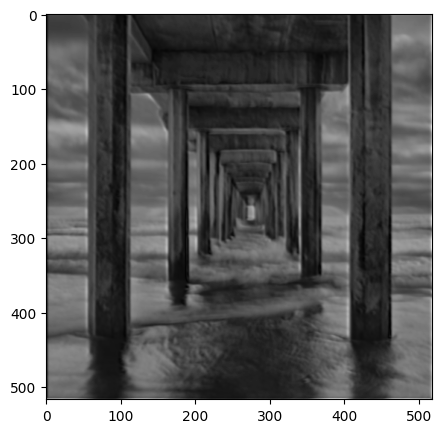

In [15]:
g_mag, g_theta = gradient(smoothed)
print('Gradient magnitude:')
plt.imshow(g_mag, cmap=cm.gray)
plt.show()

### Ζήτημα 2.3 Καταστολή μη-μεγίστων (Non-Maximum Suppression) [5 μονάδες]
Θα θέλαμε οι ακμές μας να είναι ευκρινείς (sharp), σε αντίθεση με αυτές στην εικόνα ντεγκραντέ (gradient image). Χρησιμοποιήστε καταστολή μη-μεγίστων για να διατηρήσετε όλα τα τοπικά μέγιστα και απορρίψτε τα υπόλοιπα. Μπορείτε να χρησιμοποιήσετε την ακόλουθη μέθοδο για να το κάνετε:

  - Για κάθε εικονοστοιχείο στην εικόνα του μέτρου (μεγέθους) της κλίσης (gradient magnitude image):
    - Στρογγυλοποιήστε την κατεύθυνση της κλίσης $\theta$ στο πλησιέστερο πολλαπλάσιο των $45^{\circ}$ (το οποίο θα αναφέρουμε ως $ve$).
    - Συγκρίνετε την ισχύ της ακμής (edge strength) στο τρέχον εικονοστοιχείο (δηλαδή το μέτρο της κλίσης) με τα εικονοστοιχεία κατά μήκος της κατεύθυνσης κλίσης $+ve$ και $-ve$ στην 8-γειτονιά του (8-connected pixel neighborhood).
    - Εάν το εικονοστοιχείο δεν έχει μεγαλύτερη τιμή από τους δύο γείτονές του στις κατευθύνσεις κλίσης $+ve$ και $-ve$, καταργήστε (suppress) την τιμή του εικονοστοιχείου (ορίστε το σε 0). Ακολουθώντας αυτή τη διαδικασία, διατηρούμε τις τιμές μόνο εκείνων των pixel που έχουν μέγιστα μεγέθη κλίσης στη γειτονιά κατά μήκος των κατευθύνσεων κλίσης $+ve$ και $-ve$.
  - Επιστρέψτε το αποτέλεσμα ως την εικόνα-απόκριση της καταστολής μη-μεγίστων (NMS).

In [22]:
def nms(g_mag, g_theta):
    """ ==========
    YOUR CODE HERE
    ========== """
    H,W = g_mag.shape #Get the size of the gradient magnitude image
    g_theta_degr = np.degrees(g_theta) #Get the degrees of the theta
    ve = np.round(g_theta_degr/45)*45 #Rounding the degrees to the nearest multiple of 45 degrees
    nms_response = np.zeros_like(g_mag)

    for i in range(1, H-1):
      for j in range(1, W-1): #Here the use of OR is for when we exceed 180 degrees when it is basically mirrored
        if (0<= ve[i,j] <45) or (315<=ve[i,j]<=360): #If the angle is 0<=ve<45 or >=315 then the neighboring pixels on the direction -ve and +ve are the ones on the left AND on the right
          pixel1 = g_mag[i,j+1]
          pixel2 = g_mag[i,j-1]
        elif (45<=ve[i,j]<90) or (270<=ve[i,j]<315): #If the angle is 45<ve<90 then the neighboring pixels on the direction -ve and +ve are the ones up and right AND down and left
          pixel1 = g_mag[i-1,j-1]
          pixel2 = g_mag[i+1,j+1]
        elif (90<=ve[i,j]<135) or (225<=ve[i,j]<270): #If the angle is 90<ve<135 then the neighboring pixels on the direction -ve and +ve are the ones up AND down
          pixel1 = g_mag[i-1,j]
          pixel2 = g_mag[i+1,j]
        elif (135<=ve[i,j]<180) or (180<=ve[i,j]<225): #If the angle is 45<ve<90 then the neighboring pixels on the direction -ve and +ve are the ones down and right AND up and left
          pixel1 = g_mag[i-1,j+1]
          pixel2 = g_mag[i+1,j-1]
        

        if (g_mag[i,j] < pixel1) or (g_mag[i,j] < pixel2): #We compare the neighboring pixels with our pixel
          nms_response[i,j] = 0 #If it is smaller we suppress it
        else:
          nms_response[i,j] = g_mag[i,j] #If it is bigger we keep it's value 

    return nms_response

NMS:


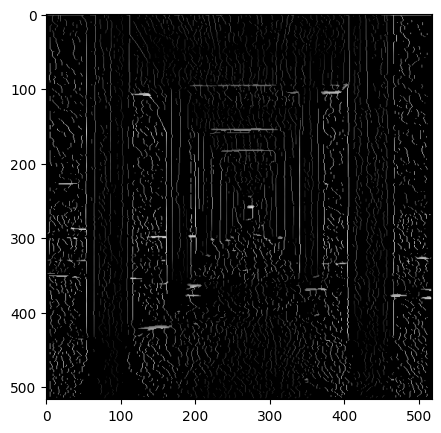

In [23]:
nms_image = nms(g_mag, g_theta)
print('NMS:')
plt.imshow(nms_image, cmap=cm.gray)
plt.show()

### Ζήτημα 2.4 Κατωφλίωση Υστέρησης (Hysteresis Thresholding) [5 μονάδες]
Επιλέξτε κατάλληλες τιμές κατωφλίων και χρησιμοποιήστε την προσέγγιση κατωφλίου που περιγράφεται στη διάλεξη 5. Αυτό θα αφαιρέσει τις ακμές που προκαλούνται από το θόρυβο και τις χρωματικές διαφοροποιήσεις. Μπορείτε να ανατρέξετε και σε άλλες πηγές (βιβλιογραφία, διαδίκτυο) για περισσότερες πληροφορίες στην προσέγγιση κατωφλίου.

  - Ορίστε δύο κατώφλια `t_min` και `t_max`.
  - Εάν το `nms > t_max`, τότε επιλέγουμε αυτό το pixel ως ακμή.
  - Εάν `nms < t_min`, απορρίπτουμε αυτό το pixel.
  - Αν `t_min < nms < t_max`, επιλέγουμε το pixel μόνο αν υπάρχει διαδρομή από/προς άλλο pixel με `nms > t_max`. (Υπόδειξη: Σκεφτείτε όλα τα pixel με `nms > t_max` ως σημεία έναρξης/εκκίνησης και εκτελέστε αναζήτηση BFS/DFS από αυτά τα σημεία εκκίνησης).
  - Η επιλογή της τιμής των χαμηλών και υψηλών κατωφλίων εξαρτάται από το εύρος των τιμών στην εικόνα μεγέθους κλίσης (gradient magnitude image). Μπορείτε να ξεκινήσετε ορίζοντας το υψηλό κατώφλι σε κάποιο ποσοστό της μέγιστης τιμής στην εικόνα μεγέθους ντεγκραντέ (gradient magnitude image), π.χ. `thres_high = 0,2 * image.max()`, και το χαμηλό όριο σε κάποιο ποσοστό του υψηλού ορίου, π.χ. `thres_low = 0,85 * thres_high`. Έπειτα, μπορείτε να συντονίσετε/τροποποιήσετε (tune) αυτές τις τιμές όπως θέλετε.

In [77]:
def hysteresis_threshold(image, g_theta, use_g_theta=False):
    """ ==========
    YOUR CODE HERE
    ========== """
    nms_image = nms(image, g_theta)
    t_max = 0.38 * image.max() #Set the maximum thresshold
    t_low = 0.82 * t_max #Set the minimum thresshold   
    result = np.zeros_like(image) #Getting an image filled with zeros like our input image
    H,W = nms_image.shape #Getting the dimensions of the image
    angle = np.round(g_theta/45)*45
    for i in range(H):
      for j in range(W):
        if (nms_image[i,j] >= t_max):
          result[i,j] = 255
        elif (nms_image[i,j] >= t_low):
          if (use_g_theta):
            if (0<=angle[i,j]<45) or (45<=angle[i,j]<90) or (90<=angle[i,j]<135) or (135<=angle[i,j]<170) or (180<=angle[i,j]<225) or (225<=angle[i,j]<270) or (270<=angle[i,j]<315) or (315<=angle[i,j]<360):
              result[i,j] = 255
          else:
            result[i,j] = 255
    return result

Thresholded:


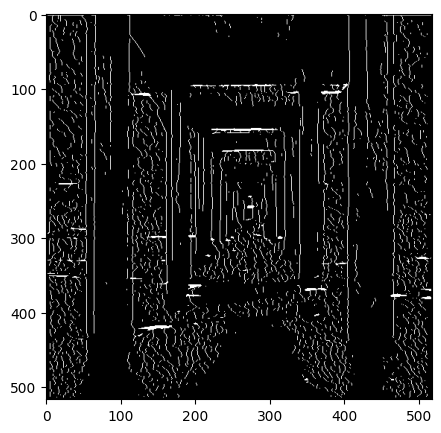

In [78]:
thresholded = hysteresis_threshold(nms_image, g_theta)
print('Thresholded:')
plt.imshow(thresholded, cmap=cm.gray)
plt.show()

## Οδηγίες υποβολής

Μην ξεχάσετε να κάνετε turnin **τόσο** το αρχείο Jupyter notebook όσο και το PDF αρχείο αυτού του notebook μαζί με το συνοδευτικό αρχείο `onoma.txt`:
**turnin  assignment_2@mye046  onoma.txt  assignment2.ipynb  assignment2.pdf**

Βεβαιωθείτε ότι το περιεχόμενο σε **κάθε κελί εμφανίζεται** καθαρά στο τελικό σας αρχείο PDF.
Για να μετατρέψετε το σημειωματάριο σε PDF, μπορείτε να επιλέξετε **έναν** από τους παρακάτω τρόπους:

1. Google Collab (Συνιστάται): You can `print` the web page and save as PDF (e.g. Chrome: Right click the web page $\rightarrow$ Print... $\rightarrow$ Choose "Destination: Save as PDF" and click "Save"). Προσοχή στην περίπτωση όπου κώδικας/σχόλια εμφανίζονται εκτός των ορίων της σελίδας. Μια λύση είναι η αλλαγή γραμμής π.χ. σε σχόλια που υπερβαίνουν το πλάτος της σελίδας.

2. Local Jupyter/JupyterLab(Συνιστάται): You can `print` the web page and save as PDF (File $\rightarrow$ Print... $\rightarrow$ Choose "Destination: Save as PDF" and click "Save"). Προσοχή στην περίπτωση όπου κώδικας/σχόλια εμφανίζονται εκτός των ορίων της σελίδας. Μια λύση είναι η αλλαγή γραμμής π.χ. σε σχόλια που υπερβαίνουν το πλάτος της σελίδας.

3. Local Jupyter/JupyterLab(Συνιστάται!): You can `export` and save as HTML (File $\rightarrow$ Save & Export Notebook as... $\rightarrow$ HTML). Στη συνέχεια μπορείτε να μετατρέψεται το HTML αρχείο αποθηκεύοντάς το ως PDF μέσω ενός browser.